In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = "monospace"
pd.set_option('display.max_columns', 500)

In [2]:
# Data loaded
pitchers = pd.read_csv('all_teams_pitchers.csv')
batters = pd.read_csv('all_teams_hitters.csv')

In [3]:
# Grabbed the columns needed to calculate Cost per War.
p = pitchers[['Player', 'Team', 'Pos', 'Payroll Salary Adjusted', 'WAR']]
b = batters[['Player', 'Team', 'Pos', 'Payroll Salary Adjusted', 'WAR']]
df = pd.concat([p, b]).reset_index(drop=True)

In [4]:
# Did a test to make sure the calcuations were correct.
b1 = batters.groupby('Team').agg({'Payroll Salary Adjusted': 'sum', 'WAR': 'sum'})
b1["Cost per War"] = b1["Payroll Salary Adjusted"] / b1["WAR"]
war_team = df['Payroll Salary Adjusted'].sum() / df['WAR'].sum()

In [5]:
# Aggregated to get cost per WAR for each team.
team_agg = df.groupby('Team').agg({'Payroll Salary Adjusted':'sum', 'WAR':'sum'})
# Cost per WAR calculation and created new column for it.
team_agg['Cost per War'] = team_agg['Payroll Salary Adjusted'] / team_agg['WAR']

In [51]:
team_agg_sorted = team_agg.sort_values(by="Cost per War", ascending=False)
team_agg_sorted.head()

,Payroll Salary Adjusted,WAR,Cost per War
Team,,,
CHW,74306691,10.8,6.880249e+06
TOR,112230693,16.4,6.843335e+06
TEX,145959070,24.6,5.933296e+06
NYY,259328692,44.8,5.788587e+06
LAA,72929861,14.1,5.172331e+06


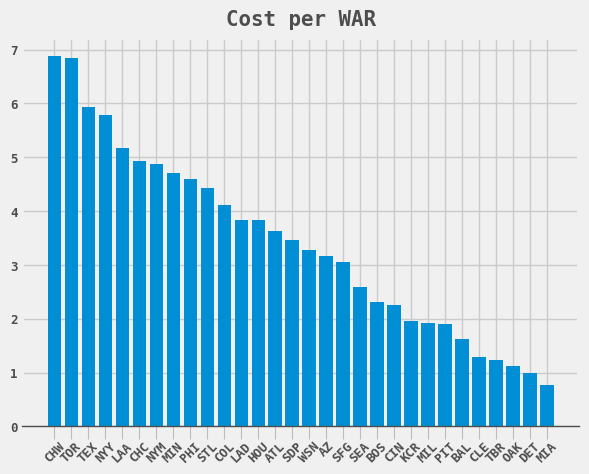

In [53]:
fig, ax = plt.subplots()

ax.bar(team_agg_sorted.index,team_agg_sorted['Cost per War'] / 1000000)

ax.set_title('Cost per WAR', fontsize=15, fontweight='bold', color='#4d4d4d', y=1.01)

plt.xticks(rotation=45, fontsize=9, color='#4d4d4d', fontweight='bold')
ax.tick_params(axis='x', length=9, color='#bdbdbd', pad=0) 

plt.yticks(fontsize=9, color='#4d4d4d', fontweight='semibold')

ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['bottom'].set_linewidth(1)

plt.show()